In [1]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [2]:
# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [3]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()


In [4]:
# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

In [5]:
# Re-load the model's trained weights
model.load_weights("model_weights.h5")

In [45]:
# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = image.load_img("Ch04/plane1.jfif", target_size=(32, 32))

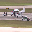

In [46]:
img

In [47]:
# Convert the image to a numpy array
image_to_test = image.img_to_array(img) / 255

In [48]:
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

In [49]:
# Make a prediction using the model
results = model.predict(list_of_images)

In [50]:
# check the first result
single_result = results[0]

In [51]:
# get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [52]:
class_label = class_labels[most_likely_class_index]

In [53]:
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Plane - Likelihood: 0.809037
